In [1]:
# what happens if G is highly correlated with E?

In [2]:
import os,sys,glob,gzip
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import seaborn as sns

In [3]:
df=pd.DataFrame()
df['pheno']= np.random.rand(100) * 2  # phenotype
df['G']= df['pheno'] + (np.random.randn(100) * 0.1)  # genotype
df['E']= df['pheno'] + (np.random.randn(100) * 0.1)  # environment

In [4]:
df

,pheno,G,E
0,1.860722,1.982408,1.716841
1,0.942371,0.989434,0.957038
2,0.573829,0.516955,0.595486
3,1.642474,1.541842,1.722827
4,0.278521,0.432818,0.357519
...,...,...,...
95,1.496516,1.530771,1.594010
96,1.299897,1.372974,1.380970
97,1.702548,1.651706,1.804019
98,0.728397,0.462733,0.592084


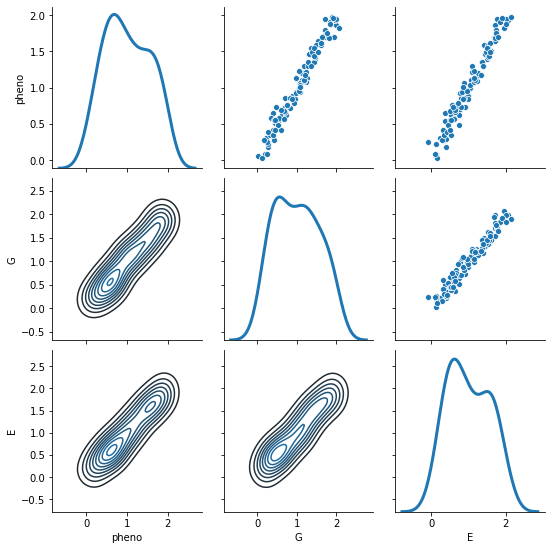

In [5]:
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [6]:
df['GxE']= df['G'] * df['E']

In [7]:
# OLS
X=st.zscore(df.reindex(columns=['G', 'E', 'GxE']))
X=sm.add_constant(X)
y=st.zscore(df['pheno']).reshape(-1, 1)
reg=sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1377.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           9.87e-79
Time:                        21:23:30   Log-Likelihood:                 47.343
No. Observations:                 100   AIC:                            -86.69
Df Residuals:                      96   BIC:                            -76.27
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.116e-16      0.015  -1.38e-14      1.000      -0.031       0.031
x1             0.5449      0.074      7.396      0.000       0.399       0.691
x2             0.4839      0.075      6.425      0.000       0.334       0.633
x3            -0.0343      0.067     -0.513      0.609      -0.167       0.099
==============================================================================
Omnibus:                        3.600   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                3.039
Skew:                           0.413   Prob(JB):                        0.219
Kurtosis:                       3.218   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
'''
Interpretation:

"x1" is beta for G
"X2" is beta for E
"x3" is beta for GxE

In this case,
x1 and x2 has high value, showing x1 and x2 fit phenotype data.
On the other hand, x3 does not have high value.
'''

'\nInterpretation:\n\n"x1" is beta for G\n"X2" is beta for E\n"x3" is beta for GxE\n\nIn this case,\nx1 and x2 has high value, showing x1 and x2 fit phenotype data.\nOn the other hand, x3 does not have high value.\n'

In [9]:
# next, change the phenotype values

In [10]:
df['pheno']= df['pheno'] * df['pheno']  # should be similar value to df['GxE']

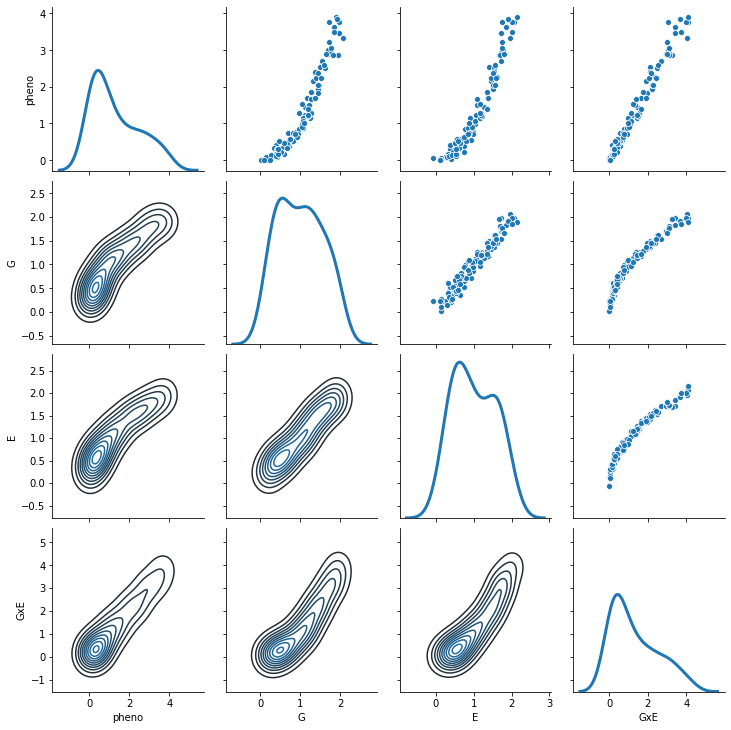

In [11]:
g=sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

In [12]:
# OLS
X=st.zscore(df.reindex(columns=['G', 'E', 'GxE']))
X=sm.add_constant(X)
y=st.zscore(df['pheno']).reshape(-1, 1)
reg=sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1329.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):           5.16e-78
Time:                        21:24:23   Log-Likelihood:                 45.619
No. Observations:                 100   AIC:                            -83.24
Df Residuals:                      96   BIC:                            -72.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.804e-16      0.016  -1.15e-14      1.000      -0.031       0.031
x1             0.0184      0.075      0.245      0.807      -0.130       0.167
x2             0.0424      0.077      0.554      0.581      -0.110       0.195
x3             0.9293      0.068     13.643      0.000       0.794       1.064
==============================================================================
Omnibus:                       22.456   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.750
Skew:                           0.736   Prob(JB):                     1.06e-13
Kurtosis:                       6.489   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
'''
Interpretation:

"x1" is beta for G
"X2" is beta for E
"x3" is beta for GxE

In this case,
x1 and x2 has low value, showing x1 and x2 did not fit phenotype data.
On the other hand, x3 has high value.
'''

In [ ]:
'''
Conclusion:

1)
  If there is a good correlation between G and E,
  betas for G and E will be a similar value.
  
2)
  Beta for GxE can be either low and high,
  depending on data.
'''